In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv("cleaned_SFM_dataset_2019_2022.csv")

In [3]:
df['t_date'] = pd.to_datetime(df['transaction_date'], format="%d/%m/%Y") 
df['t_date'] = df['t_date'].dt.to_period('M').dt.start_time
df = df[df['t_date'] < '2022-01'] #3 full years of data

In [4]:
#Filter Dataframe for households with 1 Adult & kids

df = df[df['household_type'] == '1 adult with kids']


In [5]:
single_parent_comms = [
    'Baked bread/buns/rolls', 'Frozen pizza', 'Soup', 'Apples', 'Hot dogs', 
    'Breakfast sausage/sandwiches', 'Potatoes', 'Bread', 'Water - carbonated/flavoured drinks', 
    'Chips/snacks', 'Mushrooms', 'Onions', 'Cookies', 'Fruit', 'Yogurt', 
    'Fluid milk products', 'Tomatoes', 'Chicken/poultry', 'Snack nuts', 'Bacon', 
    'Ice cream/milk/sherbets', 'Peanut butter/jelly/jams', 'Popcorn', 'Spices', 'Snacks', 
    'Eggs', 'Canned beans', 'Processed', 'Frozen breakfast foods', 'Frozen vegetables', 
    'Frozen novelties', 'Frozen potatoes', 'Frozen pie/desserts', 'Frozen fruits', 
    'Frozen chicken', 'Packaged natural snacks', 'Frozen boxed/grocery', 'Cereal', 
    'Frozen bread/dough', 'Bacon', 'Diapers', 'Infant formula', 'Baby foods', 'Infant care products'
]



In [6]:

essential_products = df[df['commodity'].str.contains('|'.join(single_parent_comms), case=False, na=False)]
# Group by commodity and calculate the total revenue spent on each
essential_revenue = essential_products.groupby('commodity').agg(total_revenue=('price', 'sum')).sort_values('total_revenue', ascending=False)

# Display the top 10 essential products by total revenue
essential_revenue.head(10)

,total_revenue
commodity,
Fluid milk products,763.76
Tomatoes,673.27
Bread,672.58
Tropical fruit,599.83
Apples,578.49
Potatoes,572.85
Cookies,515.34
Chicken/poultry,501.44
Breakfast sausage/sandwiches,490.35


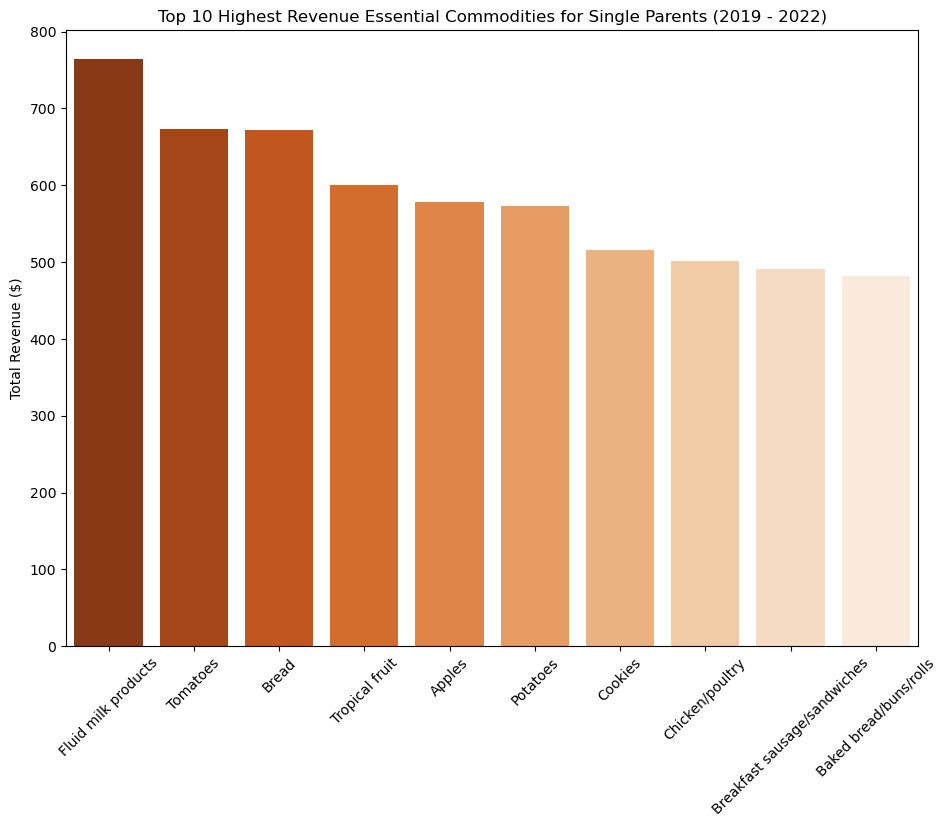

In [7]:
plt.figure(figsize=(11, 8))
sns.barplot(x=essential_revenue.head(10).index, 
            y=essential_revenue.head(10)['total_revenue'], 
            palette="Oranges_r", 
            hue=essential_revenue.head(10).index, 
            legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Highest Revenue Essential Commodities for Single Parents (2019 - 2022)')
plt.ylabel('Total Revenue ($)')
plt.xlabel('')

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();

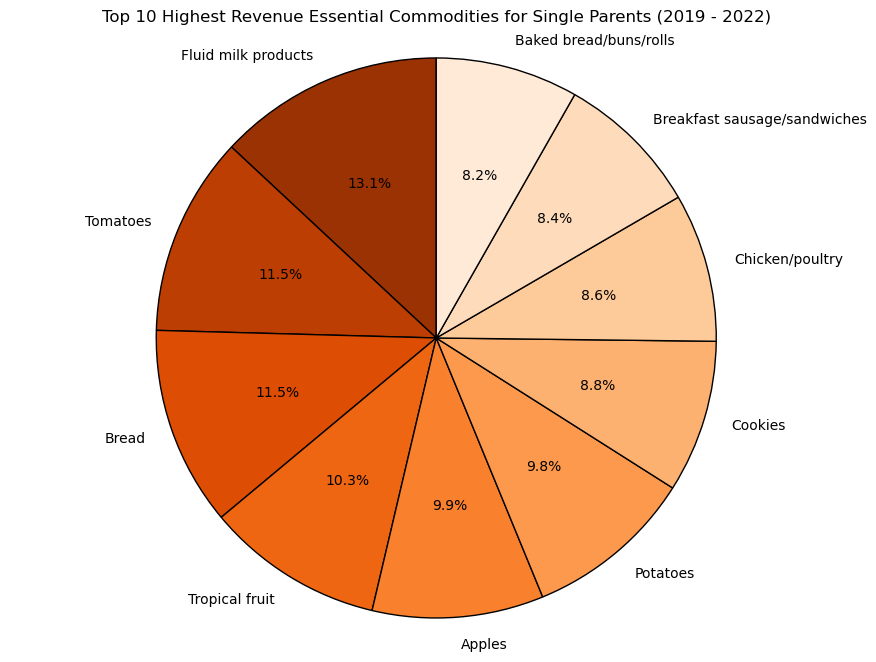

In [8]:
plt.figure(figsize=(11, 8))
plt.pie(essential_revenue.head(10)['total_revenue'], 
        labels=essential_revenue.head(10).index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("Oranges_r", n_colors=10), 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Top 10 Highest Revenue Essential Commodities for Single Parents (2019 - 2022)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();